## Работа по рекомендательным системам №1

## Файзуллов Айрат

Нужно самостоятельно реализовать колоборативную фильтрацию методами:
1. Knn нужно реализовать 2 базовых метода
1.1. Простой KNN (в библиотеке surprise называется KNNBasic)
1.2. Непараметрическая регрессия Надарайя-Ватсона (в библиотеке surprise называется KNNWithMeans)

Опыт с KNN

In [1]:
! unzip ml-100k.zip

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  inflating: ml-100k/u2.test         
  inflating: ml-100k/u3.base         
  inflating: ml-100k/u3.test         
  inflating: ml-100k/u4.base         
  inflating: ml-100k/u4.test         
  inflating: ml-100k/u5.base         
  inflating: ml-100k/u5.test         
  inflating: ml-100k/ua.base         
  inflating: ml-100k/ua.test         
  inflating: ml-100k/ub.base         
  inflating: ml-100k/ub.test         


In [2]:
import pandas as pd
import numpy as np

### Реализую самостоятельно, Basic KNN

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train_my_X = pd.read_table('ml-100k/ua.base')
train_my_X = train_my_X.rename(columns={"1": "userId", "1.1": "movieId", "5": "rating"})
train_my_X = train_my_X.drop(["874965758"], axis=1)
test_my_X = pd.read_table('ml-100k/ua.test')
test_my_X = test_my_X.rename(columns={"1": "userId", "20": "movieId", "4": "rating"})
test_my_X = test_my_X.drop(["887431883"], axis = 1)

In [5]:
train_my_Y = train_my_X['rating']
test_my_Y = test_my_X['rating']
test_my_X = test_my_X.drop(['rating'], axis=1)

In [92]:
def sim(x, y):
  # print(x)
  # print('aaa')
  # print(y)
  # print(len(np.intersect1d(x, y)))
  # sem_ret = np.sum(np.multiply(x, y))
  # ssq_x = np.sqrt(np.sum(x**2))
  # ssq_y = np.sqrt(np.sum(y**2))
  return len(np.intersect1d(x, y))

def predict_KNN(train_my_X, train_my_Y, test_my_X, n):
  ret_arr_pred = np.array([])
  for i in test_my_X.index:
    user_id = test_my_X['userId'][i]
    movie_id = test_my_X['movieId'][i]
    x = np.array(train_my_X[train_my_X['userId'] == user_id]['movieId'])
    df_to_knn = train_my_X[train_my_X['movieId'] == movie_id].drop_duplicates()
    arr_sim = []

    # user_ids_y = df_to_knn['userId'].values
    # print(user_ids_y)
    # mask = np.isin(train_my_X['userId'], user_ids_y)
    # filtered_train_my_X = train_my_X[mask]
    # print(filtered_train_my_X)
    # y_matrix = filtered_train_my_X.groupby('userId')['movieId'].apply(list).loc[user_ids_y].values
    # similarities = np.array([sim(x, y) for y in y_matrix])
    # arr_sim = list(zip(similarities, user_ids_y))
    for j in df_to_knn.index:
      user_id_y = df_to_knn['userId'][j]
      y = np.array(train_my_X[train_my_X['userId'] == user_id_y]['movieId'])
      arr_sim.append(tuple((sim(x, y), user_id_y)))
    arr_sim.sort(key=lambda a: -a[0])
    arr_sim = arr_sim[0:n]
    neighb = np.array([x[1] for x in arr_sim])
    neighb_sim = np.array([x[0] for x in arr_sim])
    neighb_grade = np.array([])
    for p in neighb:
      grade_tmp = np.array(train_my_Y[train_my_X[train_my_X['userId'] \
                                            == p][train_my_X['movieId'] == movie_id].index])

      neighb_grade = np.append(neighb_grade, grade_tmp)

    ret_arr_pred = np.append(ret_arr_pred, np.sum(np.multiply(neighb_sim, neighb_grade)) / np.sum(neighb_sim))
  return ret_arr_pred

In [260]:
import time

In [93]:
start_time = time.time()
res_pred_KNN = predict_KNN(train_my_X, train_my_Y, test_my_X, 15)
print("--- %s seconds ---" % (time.time() - start_time))
tmp_time_knn = time.time() - start_time
# res_pred_KNN.tofile("saved-pred-KNN")
# tmp.tofile("saved-tmp_time")

<ipython-input-92-0864db8c7a05>:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  grade_tmp = np.array(train_my_Y[train_my_X[train_my_X['userId'] \
<ipython-input-92-0864db8c7a05>:43: RuntimeWarning: invalid value encountered in double_scalars
  ret_arr_pred = np.append(ret_arr_pred, np.sum(np.multiply(neighb_sim, neighb_grade)) / np.sum(neighb_sim))


--- 1128.58074092865 seconds ---


Предсказание заняли 1128 секунд

In [128]:
test_my_KNN = test_my_X.copy()
test_my_KNN = test_my_KNN.assign(res_pred = res_pred_KNN, res=test_my_Y)
test_my_KNN.head()

,userId,movieId,res_pred,res
0,1,33,3.238223,4
1,1,61,3.346353,4
2,1,117,3.406612,3
3,1,155,2.946667,2
4,1,160,3.486595,4


In [6]:
from sklearn.metrics import mean_squared_error

In [104]:
np.sum(np.isnan(res_pred_KNN))
res_pred_KNN = np.where(np.isnan(res_pred_KNN), np.nanmean(res_pred_KNN, axis=0), res_pred_KNN)

Качество по метрике RMSE для Basic KNN с 15 ближайшими соседями

In [192]:
mean_squared_error(test_my_Y, res_pred_KNN, squared=False)

1.0641224531922073

### Опыт с непараметрической регрессией Надарайя-Ватсона



In [123]:
def sim(x, y):
  # print(x)
  # print('aaa')
  # print(y)res_pred_KNN
  # print(len(np.intersect1d(x, y)))
  # sem_ret = np.sum(np.multiply(x, y))
  # ssq_x = np.sqrt(np.sum(x**2))
  # ssq_y = np.sqrt(np.sum(y**2))
  return len(np.intersect1d(x, y))

def predict_mean_KNN(train_my_X, train_my_Y, test_my_X, n):
  ret_arr_pred = np.array([])
  for i in test_my_X.index:
    user_id = test_my_X['userId'][i]
    movie_id = test_my_X['movieId'][i]
    x = np.array(train_my_X[train_my_X['userId'] == user_id]['movieId'])
    # print(x)
    df_to_knn = train_my_X[train_my_X['movieId'] == movie_id].drop_duplicates()
    arr_sim = []

    # user_ids_y = df_to_knn['userId'].values
    # print(user_ids_y)
    # mask = np.isin(train_my_X['userId'], user_ids_y)
    # filtered_train_my_X = train_my_X[mask]
    # print(filtered_train_my_X)
    # y_matrix = filtered_train_my_X.groupby('userId')['movieId'].apply(list).loc[user_ids_y].values
    # similarities = np.array([sim(x, y) for y in y_matrix])
    # arr_sim = list(zip(similarities, user_ids_y))
    for j in df_to_knn.index:
      user_id_y = df_to_knn['userId'][j]
      y = np.array(train_my_X[train_my_X['userId'] == user_id_y]['movieId'])
      arr_sim.append(tuple((sim(x, y), user_id_y)))
    arr_sim.sort(key=lambda a: -a[0])
    arr_sim = arr_sim[0:n]
    neighb = np.array([x[1] for x in arr_sim])
    neighb_sim = np.array([x[0] for x in arr_sim])
    neighb_grade = np.array([])
    # print (neighb)
    for p in neighb:
      grade_tmp = np.array(train_my_Y[train_my_X[train_my_X['userId'] \
                                            == p][train_my_X['movieId'] == movie_id].index])
      avg_tmp = np.mean(np.array(train_my_Y[train_my_X[train_my_X['userId'] == p].index]))
      neighb_grade = np.append(neighb_grade, grade_tmp - avg_tmp)

    avg_tmp_x = np.mean(np.array(train_my_Y[train_my_X[train_my_X['userId'] == user_id].index]))
    ret_arr_pred = np.append(ret_arr_pred, avg_tmp_x + np.sum(np.multiply(neighb_sim, neighb_grade)) / np.sum(neighb_sim))
  return ret_arr_pred

In [124]:
start_time = time.time()
res_pred_KNN_mean = predict_mean_KNN(train_my_X, train_my_Y, test_my_X, 15)
print("--- %s seconds ---" % (time.time() - start_time))
tmp_time_knn_mean = time.time() - start_time

<ipython-input-123-fb9d7d127bbb>:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  grade_tmp = np.array(train_my_Y[train_my_X[train_my_X['userId'] \
<ipython-input-123-fb9d7d127bbb>:46: RuntimeWarning: invalid value encountered in double_scalars
  ret_arr_pred = np.append(ret_arr_pred, avg_tmp_x + np.sum(np.multiply(neighb_sim, neighb_grade)) / np.sum(neighb_sim))


--- 1258.4939787387848 seconds ---


Предсказание заняли 1258 секунд

In [130]:
test_my_KNN_mean = test_my_X.copy()
test_my_KNN_mean = test_my_KNN_mean.assign(res_pred = res_pred_KNN_mean, res=test_my_Y)
test_my_KNN_mean.head()

,userId,movieId,res_pred,res
0,1,33,3.600019,4
1,1,61,3.643825,4
2,1,117,3.705422,3
3,1,155,3.231179,2
4,1,160,3.850063,4


In [126]:
res_pred_KNN_mean = np.where(np.isnan(res_pred_KNN_mean), np.nanmean(res_pred_KNN_mean, axis=0), res_pred_KNN_mean)

Качество по метрике RMSE для KNN Mean с 15 ближайшими соседями

In [193]:
mean_squared_error(test_my_Y, res_pred_KNN_mean, squared=False)

1.006899222703593

### Вывод по KNN:

In [281]:
import matplotlib.pyplot as plt

<ipython-input-123-fb9d7d127bbb>:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  grade_tmp = np.array(train_my_Y[train_my_X[train_my_X['userId'] \
<ipython-input-123-fb9d7d127bbb>:46: RuntimeWarning: invalid value encountered in double_scalars
  ret_arr_pred = np.append(ret_arr_pred, avg_tmp_x + np.sum(np.multiply(neighb_sim, neighb_grade)) / np.sum(neighb_sim))
<ipython-input-92-0864db8c7a05>:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  grade_tmp = np.array(train_my_Y[train_my_X[train_my_X['userId'] \
<ipython-input-92-0864db8c7a05>:43: RuntimeWarning: invalid value encountered in double_scalars
  ret_arr_pred = np.append(ret_arr_pred, np.sum(np.multiply(neighb_sim, neighb_grade)) / np.sum(neighb_sim))
<ipython-input-123-fb9d7d127bbb>:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  grade_tmp = np.array(train_my_Y[train_my_X[train_my_X['userId'] \
<ipython-input-123-fb9d7d127bbb>:46

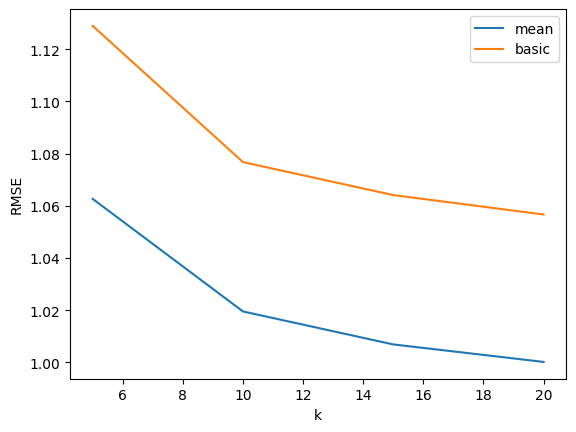

In [266]:
x1 = [5, 10, 15, 20]
a_mean = []
b_basic = []
for i in range(5, 25, 5):
  res_pred_KNN_mean = predict_mean_KNN(train_my_X, train_my_Y, test_my_X, i)
  res_pred_KNN = predict_KNN(train_my_X, train_my_Y, test_my_X, i)
  res_pred_KNN_mean = np.where(np.isnan(res_pred_KNN_mean), np.nanmean(res_pred_KNN_mean, axis=0), res_pred_KNN_mean)
  res_pred_KNN = np.where(np.isnan(res_pred_KNN), np.nanmean(res_pred_KNN, axis=0), res_pred_KNN)
  a_mean.append(mean_squared_error(test_my_Y, res_pred_KNN_mean, squared=False))
  b_basic.append(mean_squared_error(test_my_Y, res_pred_KNN, squared=False))

plt.plot(x1, a_mean, label = "mean")
plt.plot(x1, b_basic, label = "basic")
plt.xlabel("k")
plt.ylabel("RMSE")
plt.legend()
plt.show()

По качеству можно заметить, что регрессия Надрая Ватсона дает прирост к качеству по сравнению с обычным KNN. Но KNN mean считался немного дольше, чем Basic KNN

### SVD-разложение

Метод SGD

In [8]:
n_factors = 4

In [328]:
P = np.random.normal(0, 1, (len(train_my_X['userId'].drop_duplicates()), n_factors))
Q = np.random.normal(0, 1, (n_factors, len(train_my_X['movieId'].drop_duplicates())))

b_i = np.zeros(len(train_my_X['movieId'].drop_duplicates()))
b_u = np.zeros(len(train_my_X['userId'].drop_duplicates()))

result = ((np.dot(P, Q) + b_i).T + b_u).T
# result = np.dot(P, Q)
result.shape

(943, 1680)

In [306]:
sorted_movie = np.sort(train_my_X['movieId'].drop_duplicates())
lst_ind = np.arange(0, 1680)

In [327]:
def fit_SGD(lr, lambda_v, result, P, Q, b_u, b_i, iter_n):
  for t in range(0, iter_n):
    i = np.random.randint(90568)
    p_u = train_my_X.iloc[i]['userId'] - 1
    # q_i = train_my_X.iloc[i]['movieId'] - 2
    q_i = np.where(sorted_movie == train_my_X.iloc[i]['movieId'])[0][0]
    # q_i = np.where(np.array(train_my_X['movieId']) == train_my_X.iloc[i]['movieId'] )[0][0]
    e_ij = train_my_Y[i] - result[p_u, q_i]
    b_u = b_u + lr*(e_ij - lambda_v*b_u)
    b_i = b_i + lr*(e_ij - lambda_v*b_i)
    P[p_u] = P[p_u] + lr*(e_ij*Q[:, q_i] - lambda_v * P[p_u])
    Q[:, q_i] = Q[:, q_i] + lr*(e_ij * P[p_u] - lambda_v * Q[:, q_i])
    result = ((np.dot(P, Q) + b_i).T + b_u).T
  return result
    # result = np.dot(P, Q)

In [324]:
result = fit_SGD(0.005, 0.02, result, P, Q, b_u, b_i, 5000)
Q = np.nan_to_num(Q)
P = np.nan_to_num(P)

In [325]:
def pred_r():
  ans = np.array([])
  for t in range (0, len(test_my_Y)):
    i = test_my_X.iloc[t]['userId'] - 1
    j = np.where(sorted_movie == train_my_X.iloc[t]['movieId'])[0][0]
    # j = test_my_X.iloc[t]['movieId'] - 2
    # print(np.dot(P[i], Q[:, j]) + b_u[i] + b_i[j])
    ans = np.append(ans, result[i][j])
  return ans

r_pred = pred_r()

In [326]:
mean_squared_error(test_my_Y, r_pred, squared=False)

2.2000466248366717

Изобразим на графике как меняется качество предсказания SGD при кол-ве итераций 5000 и изменяемому числу факторов: от 1 до 13.

In [331]:
x1 = [1, 4, 7, 10, 13]
a_mean = []
b_basic = []
time_SGD = []
rmse_SGD = []
for i in range(1, 14, 3):
  n_factors = i

  P = np.random.normal(0, 1, (len(train_my_X['userId'].drop_duplicates()), n_factors))
  Q = np.random.normal(0, 1, (n_factors, len(train_my_X['movieId'].drop_duplicates())))

  b_i = np.zeros(len(train_my_X['movieId'].drop_duplicates()))
  b_u = np.zeros(len(train_my_X['userId'].drop_duplicates()))

  result = ((np.dot(P, Q) + b_i).T + b_u).T
  start_time = time.time()
  result = fit_SGD(0.005, 0.02, result, P, Q, b_u, b_i, 5000)
  r_pred = pred_r()
  print("--- %s seconds ---" % (time.time() - start_time))
  time_SGD.append([time.time() - start_time])
  rmse_SGD.append(mean_squared_error(test_my_Y, r_pred, squared=False))

--- 85.10228228569031 seconds ---
--- 83.3414466381073 seconds ---
--- 85.32661271095276 seconds ---
--- 85.06406545639038 seconds ---
--- 91.09278273582458 seconds ---


Можно увдеть, что при увеличении коол-ва факторов качество падает. Это вызвано тем, что у нас получаются слишком большие матрицы P и Q и кол-во итераций = 5000 является недостаточным

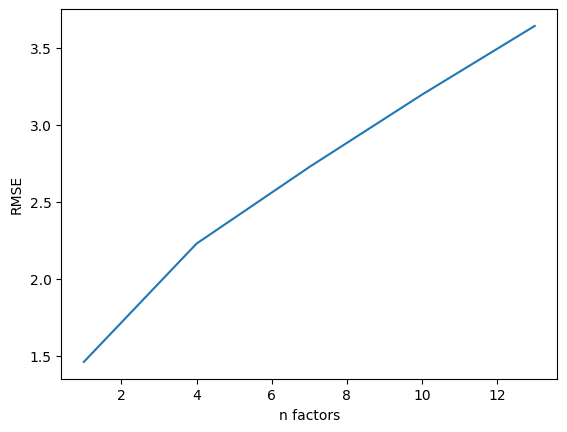

In [332]:
plt.plot(x1, rmse_SGD, label = "SGD")
# plt.plot(x1, b_basic, label = "basic")
plt.xlabel("n factors")
plt.ylabel("RMSE")
# plt.legend()
plt.show()

Замерим время и качество SGD при разном кол-ве итераци и n_factors = 4

In [334]:
x1 = [5000, 10000, 15000, 20000, 25000]
a_mean = []
b_basic = []
time_SGD_n = []
rmse_SGD_n = []
for i in range(5000, 25001, 5000):
  n_factors = 4

  P = np.random.normal(0, 1, (len(train_my_X['userId'].drop_duplicates()), n_factors))
  Q = np.random.normal(0, 1, (n_factors, len(train_my_X['movieId'].drop_duplicates())))

  b_i = np.zeros(len(train_my_X['movieId'].drop_duplicates()))
  b_u = np.zeros(len(train_my_X['userId'].drop_duplicates()))

  result = ((np.dot(P, Q) + b_i).T + b_u).T
  start_time = time.time()
  result = fit_SGD(0.005, 0.02, result, P, Q, b_u, b_i, i)
  r_pred = pred_r()
  print("--- %s seconds ---" % (time.time() - start_time))
  time_SGD_n.append([time.time() - start_time])
  rmse_SGD_n.append(mean_squared_error(test_my_Y, r_pred, squared=False))

--- 85.14227104187012 seconds ---
--- 159.18500685691833 seconds ---
--- 238.25074815750122 seconds ---
--- 327.97065567970276 seconds ---
--- 408.4059548377991 seconds ---


In [335]:
time_SGD_n

[[85.14242625236511],
 [159.18619203567505],
 [238.2509319782257],
 [327.9708318710327],
 [408.4061532020569]]

Можно заметит, что с увеличением кол-ва итераций качество повышается, но и время на предсказание тоже значительно повышается.

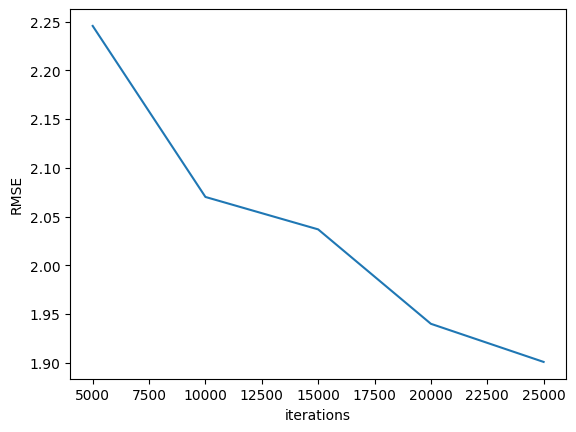

In [337]:
plt.plot(x1, rmse_SGD_n, label = "SGD")
# plt.plot(x1, b_basic, label = "basic")
plt.xlabel("iterations")
plt.ylabel("RMSE")
# plt.legend()
plt.show()

Метод ALS

In [511]:
n_factors = 2

In [531]:
P = np.random.normal(1, 1, (len(train_my_X['userId'].drop_duplicates()), n_factors))
Q = np.random.normal(1, 1, (n_factors, len(train_my_X['movieId'].drop_duplicates())))

In [532]:
P_new = np.copy(P)
Q_new = np.copy(Q)

In [570]:
diag_matr = np.diag(np.ones(n_factors)) * 0.05

In [566]:
def pred_als():
  ans = np.array([])
  for t in range (0, len(test_my_Y)):
    i = test_my_X.iloc[t]['userId'] - 1
    j = np.where(sorted_movie == train_my_X.iloc[t]['movieId'])[0][0]
    ans = np.append(ans, np.dot(P_new[i], Q_new[:, j]))
  return ans

In [579]:
def fit_als(rng, n_factors):
  P = np.random.normal(1, 1, (len(train_my_X['userId'].drop_duplicates()), n_factors))
  Q = np.random.normal(1, 1, (n_factors, len(train_my_X['movieId'].drop_duplicates())))
  diag_matr = np.diag(np.ones(n_factors)) * 0.05
  P_new = np.copy(P)
  Q_new = np.copy(Q)
  for q in range (0, rng):
    for i in range(0, P.shape[0]):
      mask = np.isin(sorted_movie, train_my_X[train_my_X['userId'] == i + 1]['movieId'])
      r_u = train_my_Y[train_my_X[train_my_X['userId'] == i + 1].index]
      P_new[i] = np.dot(np.linalg.inv(np.dot(Q_new[:, mask], Q_new[:, mask].T) + diag_matr), np.dot(Q_new[:, mask], r_u))

    for k in range(0, Q.shape[1]):
      i = sorted_movie[k]
      P_i = P_new[train_my_X[train_my_X['movieId'] == i]['userId'] - 1]
      r_i = train_my_Y[train_my_X[train_my_X['movieId'] == i].index]
      Q_new[:, k] = np.dot(np.linalg.inv(np.dot(P_i.T, P_i) + diag_matr), np.dot(P_i.T, r_i))

    r_pred = pred_als()
    # print(mean_squared_error(test_my_Y, r_pred, squared=False))
    print(q + 1, " step")
  return P_new, Q_new

In [580]:
P_new, Q_new = fit_als(1, 5)

1  step


In [581]:
r_pred = pred_als()

In [582]:
mean_squared_error(test_my_Y, r_pred, squared=False)

1.384304399378655

In [583]:
x1 = [i for i in range(1, 20, 2)]
x1

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [585]:
x1 = [i for i in range(1, 20, 2)]
a_mean = []
b_basic = []
time_als = []
rmse_als = []
for i in range(1, 20, 2):
  start_time = time.time()
  P_new, Q_new = fit_als(1, i)
  r_pred = pred_als()
  print("--- %s seconds ---" % (time.time() - start_time))
  time_als.append([time.time() - start_time])
  rmse_als.append(mean_squared_error(test_my_Y, r_pred, squared=False))

1  step
--- 7.314091682434082 seconds ---
1  step
--- 8.04987382888794 seconds ---
1  step
--- 6.998477458953857 seconds ---
1  step
--- 8.725605726242065 seconds ---
1  step
--- 7.21934962272644 seconds ---
1  step
--- 8.61226773262024 seconds ---
1  step
--- 8.50565218925476 seconds ---
1  step
--- 7.20595121383667 seconds ---
1  step
--- 8.860618591308594 seconds ---
1  step
--- 8.41986870765686 seconds ---


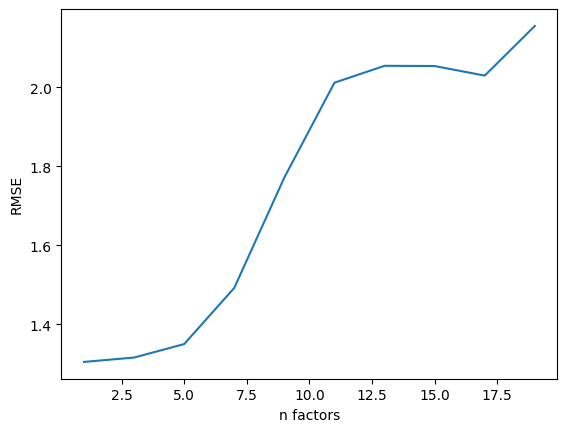

In [586]:
plt.plot(x1, rmse_als, label = "SGD")
# plt.plot(x1, b_basic, label = "basic")
plt.xlabel("n factors")
plt.ylabel("RMSE")
# plt.legend()
plt.show()

Видим что ALS дает неплохую точность при малом кол-ве факторов (от 2 до 5). При силшком большом кол-ве факторов наша модель усложнаяется и дает не такие точные предсказания.

### SVD++

Прибавим к каждой строчке P кол-во пользователей, которые оценивали те же фильмы что и пользователь i, деленное на общее кол-во пользователей

In [633]:
P = np.random.normal(0, 1, (len(train_my_X['userId'].drop_duplicates()), n_factors))
Q = np.random.normal(0, 1, (n_factors, len(train_my_X['movieId'].drop_duplicates())))

I_u = (len(train_my_X['userId'].drop_duplicates()))

# Отличие SVD от SVD++
for i in range (0, P.shape[0]):
  mask = np.isin(train_my_X['movieId'], train_my_X[train_my_X['userId'] == i]['movieId'])
  P[i] = P[i] + len(train_my_X[mask]['userId'].drop_duplicates())/I_u

b_i = np.zeros(len(train_my_X['movieId'].drop_duplicates()))
b_u = np.zeros(len(train_my_X['userId'].drop_duplicates()))


result = ((np.dot(P, Q) + b_i).T + b_u).T
# result = np.dot(P, Q)
result.shape

(943, 1680)

In [635]:
def fit_SGD_pp(lr, lambda_v, result, P, Q, b_u, b_i, iter_n):
  for t in range(0, iter_n):
    i = np.random.randint(90568)
    p_u = train_my_X.iloc[i]['userId'] - 1
    # q_i = train_my_X.iloc[i]['movieId'] - 2
    q_i = np.where(sorted_movie == train_my_X.iloc[i]['movieId'])[0][0]
    # q_i = np.where(np.array(train_my_X['movieId']) == train_my_X.iloc[i]['movieId'] )[0][0]
    e_ij = train_my_Y[i] - result[p_u, q_i]
    b_u = b_u + lr*(e_ij - lambda_v*b_u)
    b_i = b_i + lr*(e_ij - lambda_v*b_i)
    P[p_u] = P[p_u] + lr*(e_ij*Q[:, q_i] - lambda_v * P[p_u])
    Q[:, q_i] = Q[:, q_i] + lr*(e_ij * P[p_u] - lambda_v * Q[:, q_i])
    result = ((np.dot(P, Q) + b_i).T + b_u).T
  return result

In [636]:
x1 = [1, 4]
a_mean = []
b_basic = []
time_SGD_pp = []
rmse_SGD_pp = []
for i in range(1, 5, 3):
  n_factors = i

  P = np.random.normal(0, 1, (len(train_my_X['userId'].drop_duplicates()), n_factors))
  Q = np.random.normal(0, 1, (n_factors, len(train_my_X['movieId'].drop_duplicates())))

  for i in range (0, P.shape[0]):
    mask = np.isin(train_my_X['movieId'], train_my_X[train_my_X['userId'] == i]['movieId'])
    P[i] = P[i] + len(train_my_X[mask]['userId'].drop_duplicates())/I_u

  b_i = np.zeros(len(train_my_X['movieId'].drop_duplicates()))
  b_u = np.zeros(len(train_my_X['userId'].drop_duplicates()))

  result = ((np.dot(P, Q) + b_i).T + b_u).T
  start_time = time.time()
  result = fit_SGD(0.005, 0.02, result, P, Q, b_u, b_i, 5000)
  r_pred = pred_r()
  print("--- %s seconds ---" % (time.time() - start_time))
  time_SGD_pp.append([time.time() - start_time])
  rmse_SGD_pp.append(mean_squared_error(test_my_Y, r_pred, squared=False))

--- 82.02623009681702 seconds ---
--- 82.22944283485413 seconds ---


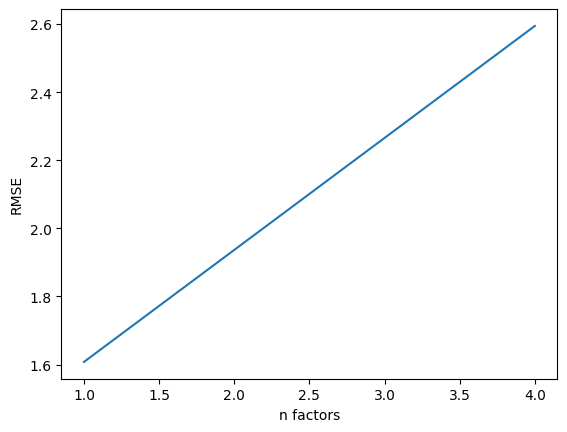

In [637]:
plt.plot(x1, rmse_SGD_pp, label = "SGD_pp")
# plt.plot(x1, b_basic, label = "basic")
plt.xlabel("n factors")
plt.ylabel("RMSE")
# plt.legend()
plt.show()

Аналогично с обычным SVD, качество SVD++ падает с увеличением факторов.

###Вывод

KNN:

  Долго работает (около 20 минут) и дает лучшее качество среди всех алгоритмов, RMSE около 1.05. И KNN mean показывает лучшие резульаты по сравнению с KNN basic

SVD:

  Оптимизация методом SGD: Качество улучшается в зависмости от кол-ва итераций. Слишком большое кол-во n_folds ухудшает результат. Получаем предсказание, качество и скорость которого обратно пропорциональны. Оптимизация на 10000 итерация занимает около 160 секунд и дает качетсво по RMSE около 2.

  Оптимизация методом ALS: Быстрая оптимизация, с которой качетсво предсказаний получается лучше чем с методом SGD. Обучение длится около 8 секунд и качество при n_folds = 4 равняется около 1.3 по RMSE.


SVD++:

  Модификация обычно SVD, с методом оптимизации SGD. Не даёт заметного прироста к качеству и скрости по сравению с обычным SGD.


Общий вывод:

  Лучше всего себя показало предсказание методом SVD, с методом оптимизации ALS